In [3]:
# Importation of library
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Data reading
data = np.loadtxt("Datasets/Dataset_1_train.csv", delimiter=",",dtype = float , usecols=(0, 1))
data_V = np.loadtxt("Datasets/Dataset_1_valid.csv", delimiter=",",dtype = float , usecols=(0, 1))
data_T = np.loadtxt("Datasets/Dataset_1_test.csv", delimiter=",",dtype = float , usecols=(0, 1))

In [5]:
data_T.shape

(50, 2)

In [6]:
# Split data into imput and output
data_X = data[:, 0]
data_Y = data[:, 1]
data_V_X = data_V[:, 0]
data_V_Y = data_V[:, 1]
data_T_X = data_T[:, 0]
data_T_Y = data_T[:, 1]
# data_Y

In [7]:
# Define a polynomial fonction
def Polynomial(data_X, degrees):
    arr=[]
    for i in range(degrees):
        arr.append(data_X**i)
    data_Xi=np.array(arr)
    X_ = np.vstack(data_Xi).T
    return X_

In [8]:
Polynomial(data_X,20).shape

(50, 20)

In [9]:
# fine the parameter W
def find_W(X, data_Y):
    
    m = X.shape[0] # Number of training examples. 
    
    # reshaping y to (m,1)
    data_Y = data_Y.reshape(m,1)
    
    # The Normal Equation
    W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, data_Y))
    
    return W

In [10]:
# fine the predicted value
def predict(X,W):
    preds = np.dot(X,W)
    
    return np.hstack(preds)

In [11]:
# Evaluation of X, X_V for data training and validation prediction model
X_P = Polynomial(data_X,21)
X_V_P = Polynomial(data_V_X,21)
X_T_P = Polynomial(data_T_X,21)

In [12]:
X_P.shape

(50, 21)

In [13]:
# Evaluation of W
W = find_W(X_P, data_Y)
W.shape

(21, 1)

In [14]:

predic = predict(X_P,W)
predic_V = predict(X_V_P,W)

In [15]:
predic.shape

(50,)

In [16]:
# genereting  X point for plotting Model training
def inputX():
    arr=[]
    datX = np.linspace(np.amin(data_X), np.amax(data_X), 1000)
    for i in range(21):
     arr.append(datX**i)
    data_Xi=np.array(arr)
#     data_Xi_V.shape
    datX = np.vstack(data_Xi)
    return datX

# #Question 1.b) Aperçu du model

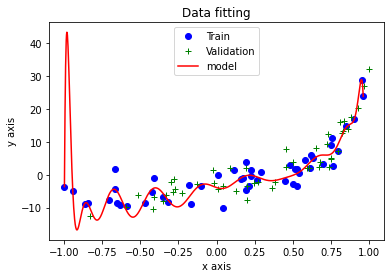

In [17]:
# Model training 
input_X = inputX()
# L= np.arange(np.amin(data),np.amax(data),0.9)
# L= np.arange(-1,1,0.01)
Y_hat = np.dot(input_X.T, W)
# Y_hat = X_P.dot( W)
plt.title("Data fitting") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(data_X,data_Y,"ob", label='Train') 
plt.plot(data_V_X,data_V_Y,"+g", label='Validation') 
plt.plot(np.linspace(np.amin(data_X), np.amax(data_X), 1000), Y_hat ,'r', label='model')
# plt.plot(L, Y_hat ,'r', label='model')
# plt.plot(t1, np.dot(W.T, X.T),'r', label='model')
# plt.plot(np.linspace(np.amin(data_V_X), np.amax(data_V_Y), 1000), np.dot(datX_V, W),'m', label='Validation')
# plt.plot(np.arange(-1, 1, 0.01), np.dot(datX, W),'r', label='model')
plt.legend()
plt.show() 

In [18]:
# Evaluation of objective function
def Loss_f(data_,predic):    
    return np.dot(np.subtract(data_,predic).T,np.subtract(data_,predic))/2

In [19]:
data_Y.shape

(50,)

In [20]:
predic.shape

(50,)

In [21]:
MSE = Loss_f(data_Y,predic)
MSE

161.86892707916365

# #Question 1.a) RMSE Train et validation

In [22]:
MSE = Loss_f(data_Y,predic)
RMSE = np.sqrt((2*MSE)/50)
MSE_V = Loss_f(data_V_Y,predic_V)
RMSE_V = np.sqrt((2*MSE_V)/50)
print(" The RMSE of the trainnig data is:",RMSE) 
print(" The RMSE of the validation data is:",RMSE_V) 

 The RMSE of the trainnig data is: 2.5445543977613343
 The RMSE of the validation data is: 37.609758670829926


In [23]:
def Regularization(X, y, lamd):
    WR = np.dot(np.linalg.inv(np.add((np.dot(X.T,X)),lamd * np.identity(21))), np.dot(X.T,y))
    return WR

In [24]:
def PlotRMSE(dat_x, dat_y,data_yva,XPV,XPD):
    Q = np.arange(0.01,1.01,0.01)
#     Q = np.logspace(-4,0,20)
    SmallRMSE = 4
    lamb = 1
    for lambVal in Q:
        wList = Regularization(dat_x, dat_y, lambVal)
        datMSE = np.dot(np.subtract(dat_y,np.dot(XPD,wList)).T,np.subtract(dat_y,np.dot(XPD,wList)))/2
        valMSE = np.dot(np.subtract(data_yva,XPV.dot(wList)).T,np.subtract(data_yva,XPV.dot(wList)))/2        
        valRMSE = np.sqrt((2*valMSE)/50)
        datRMSE = np.sqrt((2*datMSE)/50)
        if SmallRMSE > valRMSE:
            SmallRMSE = valRMSE
            lamb = lambVal
        plotRMSEvalid = plt.plot(lambVal,valRMSE,"ro", label='validation RMSE')
        ploRMSEModel = plt.plot(lambVal,datRMSE,"go", label='Training RMSE')
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("L2 Regularization RMSE vs Lambda")
    plt.legend(["Validation RMSE","Training RMSE"])
#     plt.xscale('log')
    plt.show()    
#     print( "Best RMSE validation is :", SmallRMSE)
    return print( "Best Lambda is ",lamb, " and RMSE validation is :",SmallRMSE)     

# #Question 2.a).b) Plot Train RMSE, Validation RMSE et Best lambda

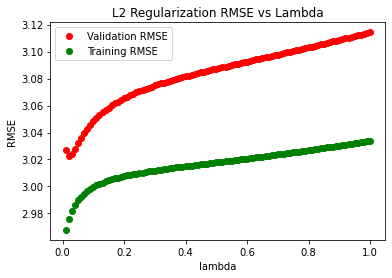

Best Lambda is  0.02  and RMSE validation is : 3.022432593904204


In [25]:
PlotRMSE(X_P,data_Y,data_V_Y,X_V_P,X_P)

# #Question 2.c) Aperçu du model apres regularisation

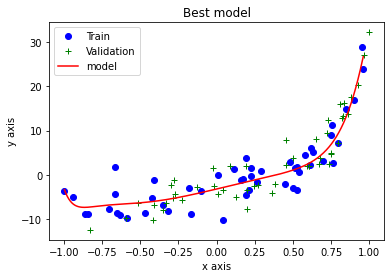

In [26]:
lamd = 0.02
wList=np.dot(np.linalg.inv(np.add((np.dot(X_P.T,X_P)),lamd * np.identity(21))), np.dot(X_P.T,data_Y))

# Model training 
input_X = inputX()
# L= np.arange(np.amin(data),np.amax(data),0.9)
# L= np.arange(-1,1,0.01)
Y_hat = np.dot(input_X.T, wList)
# Y_hat = X_P.dot( W)
plt.title("Best model") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(data_X,data_Y,"ob", label='Train') 
plt.plot(data_V_X,data_V_Y,"+g", label='Validation') 
plt.plot(np.linspace(np.amin(data_X), np.amax(data_X), 1000), Y_hat ,'r', label='model')
# plt.plot(L, Y_hat ,'r', label='model')
# plt.plot(t1, np.dot(W.T, X.T),'r', label='model')
# plt.plot(np.linspace(np.amin(data_V_X), np.amax(data_V_Y), 1000), np.dot(datX_V, W),'m', label='Validation')
# plt.plot(np.arange(-1, 1, 0.01), np.dot(datX, W),'r', label='model')
plt.legend()
plt.show() 

# #Question 2.c) Test RMSE

In [27]:
predic_T = predict(X_T_P,wList)
MSE = Loss_f(data_T_Y,predic_T)
RMSE = np.sqrt((2*MSE)/50)
print(" The RMSE of the Testing data is:",RMSE) 

 The RMSE of the Testing data is: 3.275701207516866
